<center><h1>Schmidt_Matteus_HW3</h1></center>
<br>
<center><font size="4"> 

**Name:** Matteus Schmidt

**GitHub:** MatteusSchmidt

**USCID:** 3780947272

</font></center>

---

## 1. Time Series Classification Part 1: Feature Creation/Extraction

### (a) Download Data 
### && 
### (b) Test and Train Data

Package imports

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sci
import statsmodels.api as sm

In [92]:
# Note: Jupyter env on Python 3.12

# %pip install -r ../requirements.txt

Get the AReM Data Set

In [93]:
activities = ['cycling', 'lying', 'sitting', 'standing', 'walking']
col_names = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
train_data = {}
test_data = {}

# test
for i in range(1,3):
    for j in range(1,3):
        test_data[f'bending{i}_{j}'] = pd.read_csv(f'../data/AReM/bending{i}/dataset{j}.csv', skiprows=5, header=None, names=col_names)

for activity in activities:
    for i in range(1,4):
        test_data[activity + '_' + str(i)] = pd.read_csv(f'../data/AReM/{activity}/dataset{i}.csv', skiprows=5, header=None, names=col_names)

# train
for i in range(1,3):
    for j in range(3,7):
        if i == 2 and j == 4:
            train_data[f'bending{i}_{j}'] = pd.read_csv(f'../data/AReM/bending{i}/dataset{j}.csv', delim_whitespace=True, skiprows=5, header=None, names=col_names)
        else:
            train_data[f'bending{i}_{j}'] = pd.read_csv(f'../data/AReM/bending{i}/dataset{j}.csv', skiprows=5, header=None, names=col_names)
train_data['bending1_7'] = pd.read_csv('../data/AReM/bending1/dataset7.csv', skiprows=5, header=None, names=col_names)

# I manually deleted the extra commas from line 485 of cycling_14 & cycling_8 
#   (not good practice but a massive time save for this instance)
for activity in activities:
    for i in range(4,16):
        # train_data[activity + '_' + str(i)] = pd.read_csv(f'../data/AReM/{activity}/dataset{i}.csv', skiprows=5)
        try:
            train_data[f'{activity}_{i}'] = pd.read_csv(f'../data/AReM/{activity}/dataset{i}.csv', skiprows=5, header=None, names=col_names)
        except Exception as e:
            print('error in : ', f'../data/AReM/{activity}/dataset{i}.csv')

# sanity check for .read_csv params
# for k, v in train_data.items():
#     print(v.columns)

/var/folders/gz/f7gl5mvd6ql5n5x86nqy51dr0000gn/T/ipykernel_4359/3862161341.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_data[f'bending{i}_{j}'] = pd.read_csv(f'../data/AReM/bending{i}/dataset{j}.csv', delim_whitespace=True, skiprows=5, header=None, names=col_names)


In [94]:
# finding null values
for k, v in train_data.items():
    if v.isnull().values.any():
        print(k)

for k, v in test_data.items():
    if v.isnull().values.any():
        print(k)

# correcting values // found bending2 dataset4 is separated by whitespace not commas
# print(train_data['bending2_4'])

### (c) Feature Extraction

#### i. Research

- Mean
- Quartiles / Median / IQR
- Variance
- Standard deviation
- Min
- Max
- Range
- Zero-crossings
- Angle
- Angular velocity

#### ii. Extraction

In [95]:
# min, max, mean, median, std_dev, 1st quart, 3rd quart

def extract_features(data: dict):
    return_dict = {}
    for k, v in data.items():
        features = {}
        for i, col in enumerate(v):
            if i == 0: continue
            features[f'min{i}'] = v[col].min()
            features[f'max{i}'] = v[col].max()
            features[f'mean{i}'] = v[col].mean()
            features[f'median{i}'] = v[col].median()
            features[f'std_dev{i}'] = v[col].std()
            features[f'1st_quart{i}'] = v[col].quantile(0.25)
            features[f'3rd_quart{i}'] = v[col].quantile(0.75)
        return_dict[k] = features
    return return_dict

In [96]:
train = extract_features(train_data)
test = extract_features(test_data)
data = train | test

# sanity check
# for k, v in train.items():
#     print(k, v)

df_train = pd.DataFrame(train).T
df_test = pd.DataFrame(test).T
df = pd.DataFrame(data).T

# alphabetical sort did not work as <>_10 showed before <>_2, had to improvise
def index_num(name):
    parts = name.split('_')
    return (parts[0], int(parts[1]))

df = df.loc[sorted(df.index, key=index_num)]
df.insert(0, 'Instance', range(1, int(df.shape[0] + 1)))

# check sorted for instance values // kept names for clarity
# print(df.index.to_list())
# for idx, row in df.iterrows():
#     print(idx, row['Instance'])
print(df.head())
print('\nColumns =', df.columns)
print('\nNum rows =', df.shape[0])


            Instance   min1   max1      mean1  median1  std_dev1  1st_quart1  \
bending1_1         1  37.25  45.00  40.624792    40.50  1.476967       39.25   
bending1_2         2  38.00  45.67  42.812812    42.50  1.435550       42.00   
bending1_3         3  35.00  47.40  43.954500    44.33  1.558835       43.00   
bending1_4         4  33.00  47.75  42.179812    43.50  3.670666       39.15   
bending1_5         5  33.00  45.75  41.678063    41.75  2.243490       41.33   

            3rd_quart1  min2  max2  ...  std_dev5  1st_quart5  3rd_quart5  \
bending1_1       42.00   0.0  1.30  ...  2.188449     33.0000       36.00   
bending1_2       43.67   0.0  1.22  ...  1.995255     32.0000       34.50   
bending1_3       45.00   0.0  1.70  ...  1.999604     35.3625       36.50   
bending1_4       45.00   0.0  3.00  ...  3.849448     30.4575       36.33   
bending1_5       42.75   0.0  2.83  ...  2.411026     28.4575       31.25   

            min6  max6     mean6  median6  std_dev6  1st

In [100]:
class_map = {
    'bending1': 0,
    'bending2': 1,
    'cycling': 2,
    'lying': 3,
    'sitting': 4,
    'standing': 5,
    'walking': 6
}

for dataframe in [df, df_train, df_test]:
    dataframe['bin_ind'] = [i.startswith('bending') for i in dataframe.index]
    dataframe['multiclass'] = [class_map.get(i.split('_')[0]) for i in dataframe.index]


#### iii. Standard Deviation

In [102]:
std_devs = df.std()

def bootstrap_std_CI(data, loops):
    sample_std = []
    n = data.shape[0]

    for i in range(loops):
        y = sci.random.choices(data.tolist(), k=n)
        std = np.std(y, ddof=1)
        sample_std.append(std)

    lower = np.percentile(sample_std, 5)
    upper = np.percentile(sample_std, 95)
    return (float(lower), float(upper))

ci_results = {}
for col in df.columns:
    if col == 'Instance' or col == 'multiclass' or col == 'bin_ind': continue
    ci_results[col] = bootstrap_std_CI(df[col], 1000)

In [103]:
print('Confidence Intervals\n--------------------')
for k,v in ci_results.items():
    print('\t' + k + ':', v)

Confidence Intervals
--------------------
	min1: (8.271324168643137, 10.840427417641857)
	max1: (3.3498868237717, 5.328596480449561)
	mean1: (4.758087030279096, 5.85491853907736)
	median1: (4.809269056448807, 6.020219224489419)
	std_dev1: (1.5712686303919652, 1.946875075317252)
	1st_quart1: (5.624271240802602, 6.652692656638017)
	3rd_quart1: (4.356991981691253, 5.7960494513886305)
	min2: (0.0, 0.0)
	max2: (4.652163670255347, 5.389809712328224)
	mean2: (1.4021751385572343, 1.7059906381585226)
	median2: (1.221874125642295, 1.5440006959376857)
	std_dev2: (0.809021916991066, 0.9445337017309365)
	1st_quart2: (0.8385926611422352, 1.0360154674672053)
	3rd_quart2: (1.8832442411589618, 2.300111214575888)
	min3: (2.7627848589616324, 3.1159138417100856)
	max3: (4.1194913900692995, 5.404124011312893)
	mean3: (3.385771185725646, 4.476471145764539)
	median3: (3.4607178286530242, 4.558172759362063)
	std_dev3: (0.7631684112903383, 1.1272272886350754)
	1st_quart3: (3.6009202938962694, 4.70620094238502)

#### iv. Select Features

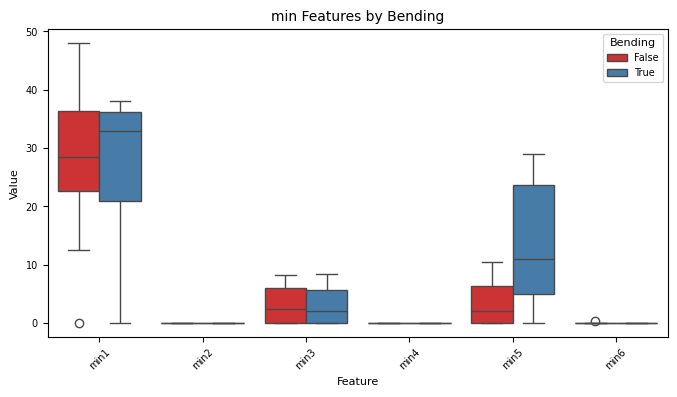

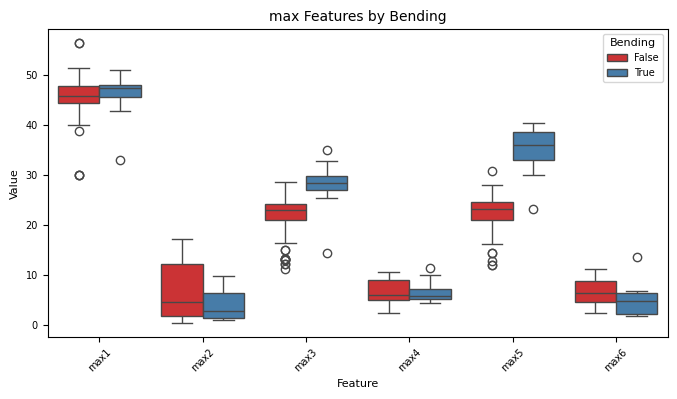

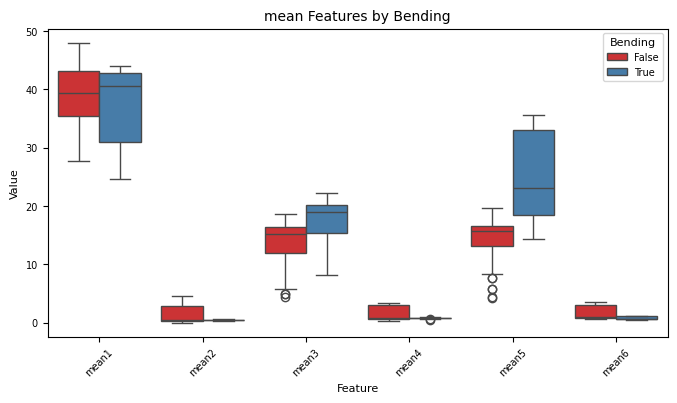

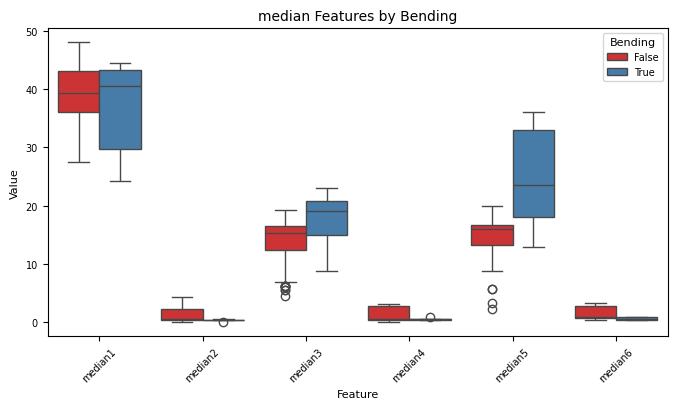

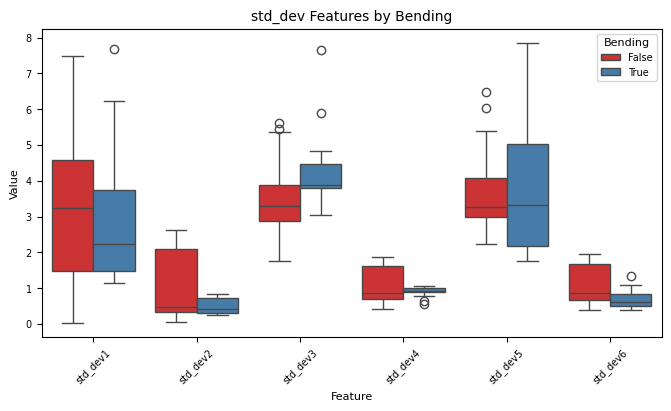

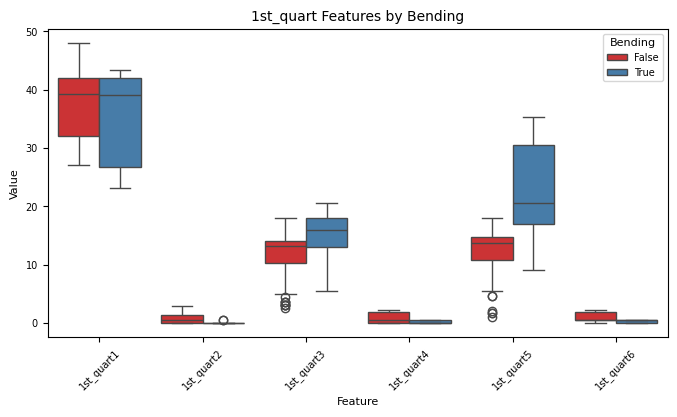

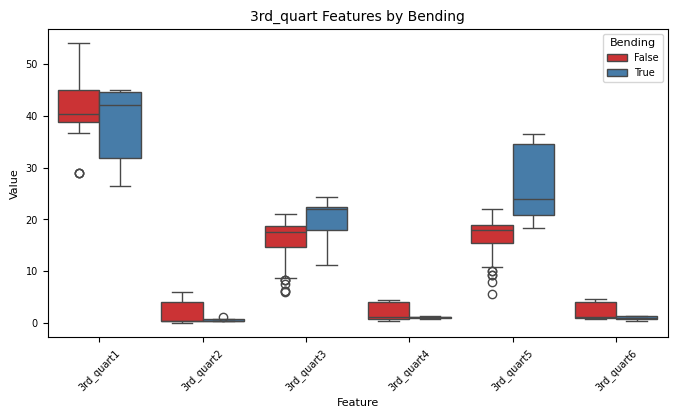

In [126]:
vars = ['min', 'max', 'mean', 'median', 'std_dev', '1st_quart', '3rd_quart']

for var in vars:
    cols = [col for col in df.columns if col.startswith(var)]
    if not cols: continue
    temp = df[cols + ['bin_ind']].melt(id_vars='bin_ind', 
                                         var_name='feature', 
                                         value_name='value')

    plt.figure(figsize=(8, 4))
    sns.boxplot(data=temp, x='feature', y='value', hue='bin_ind', width=0.8, palette='Set1')
    plt.title(f'{var} Features by Bending', fontsize=10)
    plt.xlabel('Feature', fontsize=8)
    plt.ylabel('Value', fontsize=8)
    plt.xticks(rotation=45, fontsize=7)
    plt.yticks(fontsize=7)
    plt.legend(title='Bending', fontsize=7, title_fontsize=8)


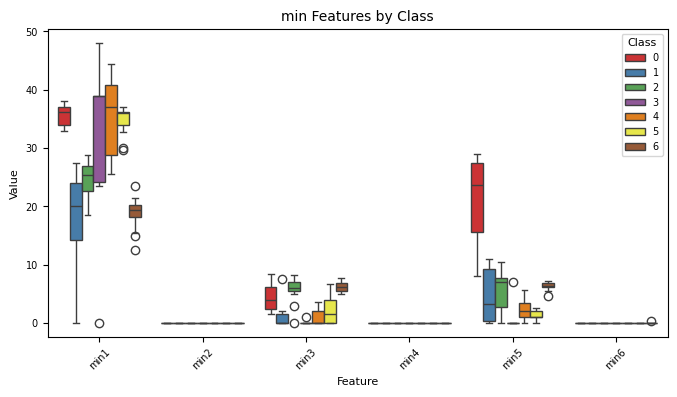

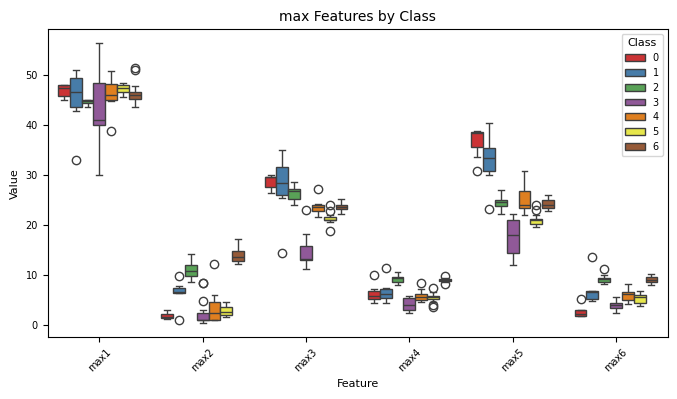

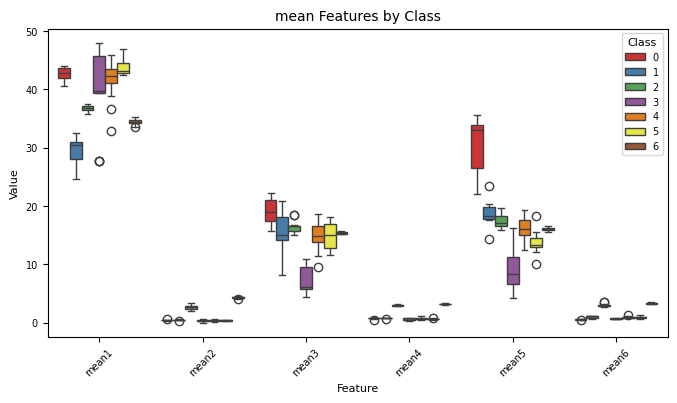

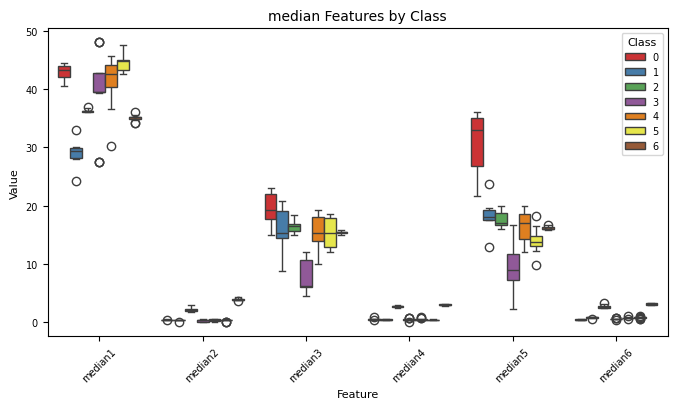

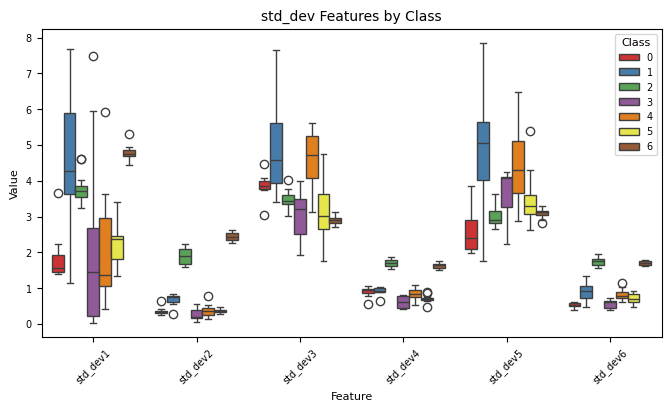

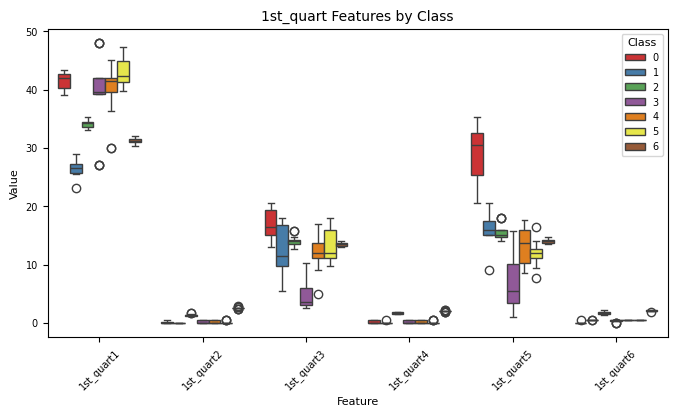

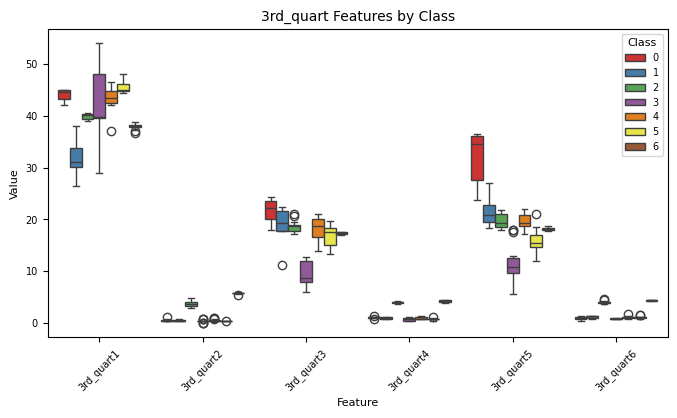

In [128]:
for var in vars:
    cols = [col for col in df.columns if col.startswith(var)]
    if not cols: continue
    temp = df[cols + ['multiclass']].melt(id_vars='multiclass', 
                                         var_name='feature', 
                                         value_name='value')

    plt.figure(figsize=(8, 4))
    sns.boxplot(data=temp, x='feature', y='value', hue='multiclass', width=0.8, palette='Set1')
    plt.title(f'{var} Features by Class', fontsize=10)
    plt.xlabel('Feature', fontsize=8)
    plt.ylabel('Value', fontsize=8)
    plt.xticks(rotation=45, fontsize=7)
    plt.yticks(fontsize=7)
    plt.legend(title='Class', fontsize=7, title_fontsize=8)

Based on the class separation and boxplot visualizations, the three most important time-domain features are:

- mean (separates bending and walking somewhat well)
- max (clearly highlights peak sensor responses for specific classes, more differentiable than other metrics)
- std_dev (indicates class-specific variation, especially in the multiclass setup)

## 2. ISLR 3.7.4

### (a) Linear Train

The training RSS of the cubic model must be less than or equal to that of the linear model. This is because the cubic model includes all terms from the linear model, along with additional quadratic and cubic terms. Even if the true relationship is linear, the RSS cannot increase as the cubic model can replicate the linear fit and potentially reduce the residuals further by overfitting random variation in the training data.

### (b) Linear Test

We would expect the cubic model to underperform in testing, and have a respectively higher RSS than that of the linear model. This is due to the fact that as mentioned before, the cubic model is likely overfit to noise in the training data, making it less generalizable and worse when deployed.

### (c) Not Linear Train

The training RSS of the cubic model must be less than or equal to that of the linear model. This is because the cubic model includes all terms from the linear model, along with additional quadratic and cubic terms. As the true relationship is non-linear, the RSS would decrease as the cubic model can better replicate the true functional form of the predictor-to-response relationship. This assumes that the noise is relatively small, and that the cubic model does not overfit purely to noise but instead captures meaningful curvature present in the training data.

### (d) Not Linear Testing

We would expect the cubic model to perform better in testing as well, and have a respectively lower testing RSS than that of the linear model. This is due to the fact that as mentioned before, the cubic model is likely to fit the training data and true functional form more accurately, making it more generalizable and better when deployed.

## 3. ISLR 3.7.3 - Extra Practice 

## 3. ISLR 3.7.5 - Extra Practice 

# References

**Markdown Guide**: https://www.markdownguide.org/cheat-sheet/

**Pandas CSV for params**: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

**Time Domain Features**: https://dganesan.github.io/mhealth-course/chapter3-activityrecognition/ch3-time-domain-features.html#:~:text=Time%2Ddomain%20features%20represent%20statistical,activities%20based%20on%20accelerometer%20data.

**Bootstrapping** https://www.digitalocean.com/community/tutorials/bootstrap-sampling-in-python